In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
data = pd.read_csv('2024-03-20_VPB.csv')
data

,date,VND,demand,supply
0,2024-03-20,18.65,8386,6144
1,2024-03-19,18.15,10895,4260
2,2024-03-18,18.20,15006,5046
3,2024-03-15,18.65,10608,4572
4,2024-03-14,18.80,7998,4640
...,...,...,...,...
1047,2020-08-01,20.10,1424,1241
1048,2020-07-01,20.35,747,609
1049,2020-06-01,19.95,805,690
1050,2020-03-01,20.40,961,1011


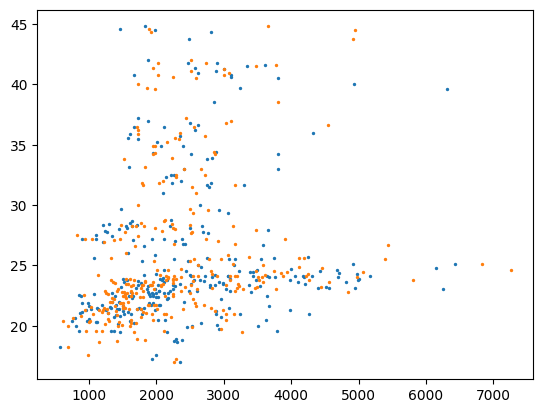

In [19]:
data_short = data[len(data)-300:]
plt.scatter(data_short['demand'], data_short['VND'], s=2)
plt.scatter(data_short['supply'], data_short['VND'], s=2)

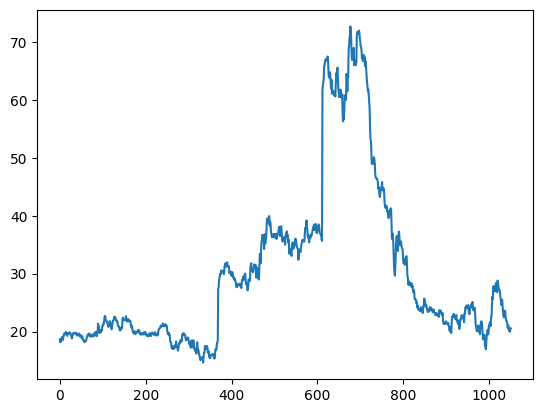

In [20]:
plt.plot(data['VND'])

In [21]:
def check_outliers(data):
    Q3 = np.percentile(data, 40, method='midpoint')
    Q1 = np.percentile(data, 15, method='midpoint')
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    print(f'upper {upper}')
    print(f'lower {lower}')
    mask = (data > upper) | (data < lower)  # Use | instead of !
    return mask


def remove_outlier(df, labels):
    result = df.copy()
    for l in labels:
       name_new_col = f'ol_{l}'
       data_new = check_outliers(result[l])
       result[name_new_col] = data_new
       result = result[result[name_new_col] != True]
       result = result.drop(labels=name_new_col, axis=1)
    return result


In [22]:
new_data = remove_outlier(data, labels=['VND'])

upper 25.799999999999997
lower 15.400000000000004


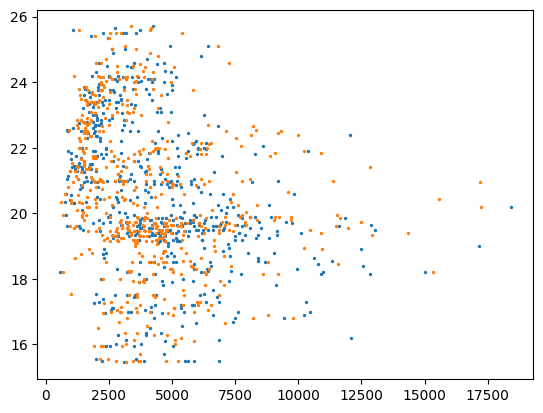

In [23]:
plt.scatter(new_data['demand'], new_data['VND'], s=2)
plt.scatter(new_data['supply'], new_data['VND'], s=2)

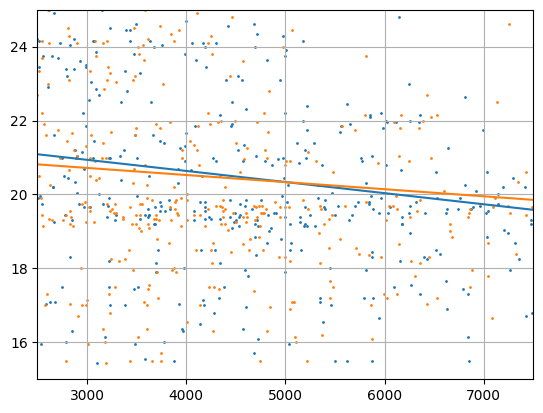

In [24]:
x = np.linspace(500, 10000, 1000)

x_d = new_data['demand'].values
y = new_data['VND'].values

z = np.polyfit(x_d, y, 1)
y_hat = z[1] + z[0]*x

plt.scatter(new_data['demand'], new_data['VND'], s=1)
plt.scatter(new_data['supply'], new_data['VND'], s=1)
plt.plot(x, y_hat)


x_s = new_data['supply'].values
z_s = np.polyfit(x_s, y, 1)

y_hat_s = z_s[1] + z_s[0]*x
plt.plot(x, y_hat_s)

plt.ylim(15, 25)
plt.xlim(2500, 7500)
plt.grid()

In [29]:
def mid_data(df):
    y = df['VND'].values
    x_d = df['demand'].values
    x_s = df['supply'].values
    
    max_ = np.max(x_d) if np.max(x_d) > np.max(x_s) else np.max(x_s)
    x_sm = np.linspace(0, max_, int(max_*1000))
    
    # procesing demand
    z_d = np.polyfit(x_d, y, 1)
    y_hat_d = z_d[1] + z_d[0]*x_sm
    y_hat_d = np.round(y_hat_d, 2)

    # procesing demand
    z_s = np.polyfit(x_s, y, 1)
    y_hat_s = z_s[1] + z_s[0]*x_sm
    y_hat_s = np.round(y_hat_s, 2)

    index_equal = np.where(y_hat_d == y_hat_s)[0]

    return np.median(y_hat_d[index_equal])

In [30]:
mid_data(new_data)

20.33

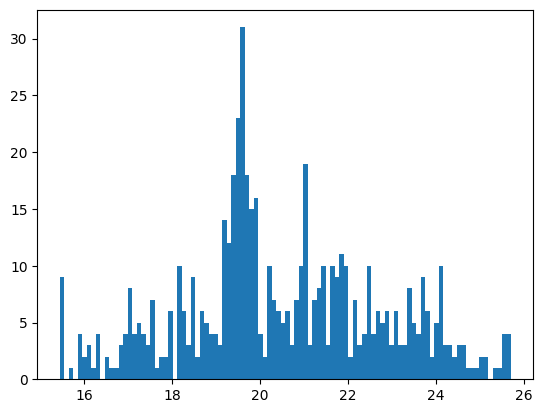

In [27]:
plt.hist(new_data['VND'], bins=100)
plt.show()

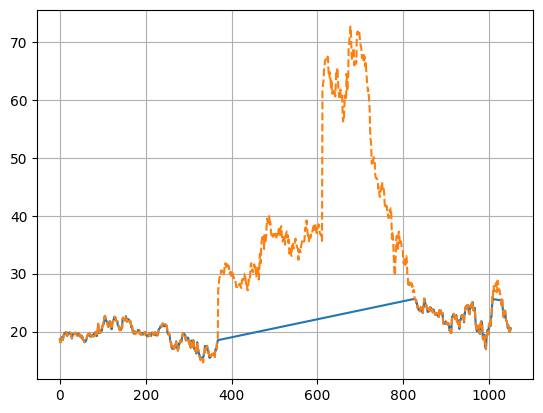

In [28]:
plt.plot(new_data['VND'])
plt.plot(data['VND'], '--')
plt.grid()